In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File Acces Activity_ New Data

In [4]:
enlace= "H:\Mi unidad\Trabajo de grado 2\DATAFRAME SOLOS_PROPUESTA\Data Base_PROPUESTA TAMURA\File Acces_New_muestra Edwin.csv"
df=pd.read_csv(enlace)

In [12]:
df.head(4)

,timestamp,json.file_path,json.file_share,json.source_address,json.timestamp,json.source_asset,json.target_address,json.file_name,json.access_types,json.source_json.eventCode,json.source_json.timeWritten,json.user,fecha,hora
0,1712453052878,//SYSVOL/recoip.mil.co/Policies/{31B2F340-016D...,SYSVOL,fe80::fedb:4897:b6ec:ca1c,2024-04-06T23:39:31.562Z,unknown,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:39:31.562349000Z,unknown,2024/04/06,18:39:31
1,1712453052878,//SYSVOL/recoip.mil.co/Policies/{6AC1786C-016F...,SYSVOL,fe80::fedb:4897:b6ec:ca1c,2024-04-06T23:39:31.565Z,unknown,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:39:31.565902100Z,unknown,2024/04/06,18:39:31
2,1712453307090,//SYSVOL/recoip.mil.co/Policies/{31B2F340-016D...,SYSVOL,10.20.40.4,2024-04-06T23:43:34.187Z,servicios.recoip.mil.co,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:43:34.187835600Z,unknown,2024/04/06,18:43:34
3,1712453374929,//SYSVOL/recoip.mil.co/Policies/{31B2F340-016D...,SYSVOL,fe80::fedb:4897:b6ec:ca1c,2024-04-06T23:44:31.758Z,unknown,pacifico.recoip.mil.co,gpt.ini,ReadData,5145,2024-04-06T23:44:31.758370200Z,unknown,2024/04/06,18:44:31


# Visualización

# La primer agrupación por hora -> json.target_address

Direcciones internas de  origen, de donde se hizo la modificación 

In [5]:
# Contar ocurrencias de cada valor único en la columna 'json.target_address'
conteo_unico = df["json.target_address"].value_counts()

# Convertir el resultado en un DataFrame para mejor presentación
conteo_unico_df = conteo_unico.reset_index()
conteo_unico_df.columns = ['Target Address', 'Count']
conteo_unico_df

,Target Address,Count
0,pacifico.recoip.mil.co,999948
1,e09-411d9t2.rinpa.mil,30
2,f09-8cc1313q45.rinpa.mil,10
3,f09-jfmn9t2.rinpa.mil,6
4,e09-47fc9t2.rinpa.mil,2
5,e09-h616305142.rinpa.mil,2
6,e09-69wjkd3.rinpa.mil,2


In [6]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.target_address']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)
df_agrupado

,hora,json.target_address,count
9552,08:30:49,pacifico.recoip.mil.co,712
10034,08:38:58,pacifico.recoip.mil.co,710
10035,08:38:59,pacifico.recoip.mil.co,599
10524,08:48:14,pacifico.recoip.mil.co,553
9551,08:30:48,pacifico.recoip.mil.co,548
...,...,...,...
11661,09:09:04,pacifico.recoip.mil.co,1
19318,12:38:18,pacifico.recoip.mil.co,1
11512,09:06:27,pacifico.recoip.mil.co,1
11511,09:06:26,pacifico.recoip.mil.co,1


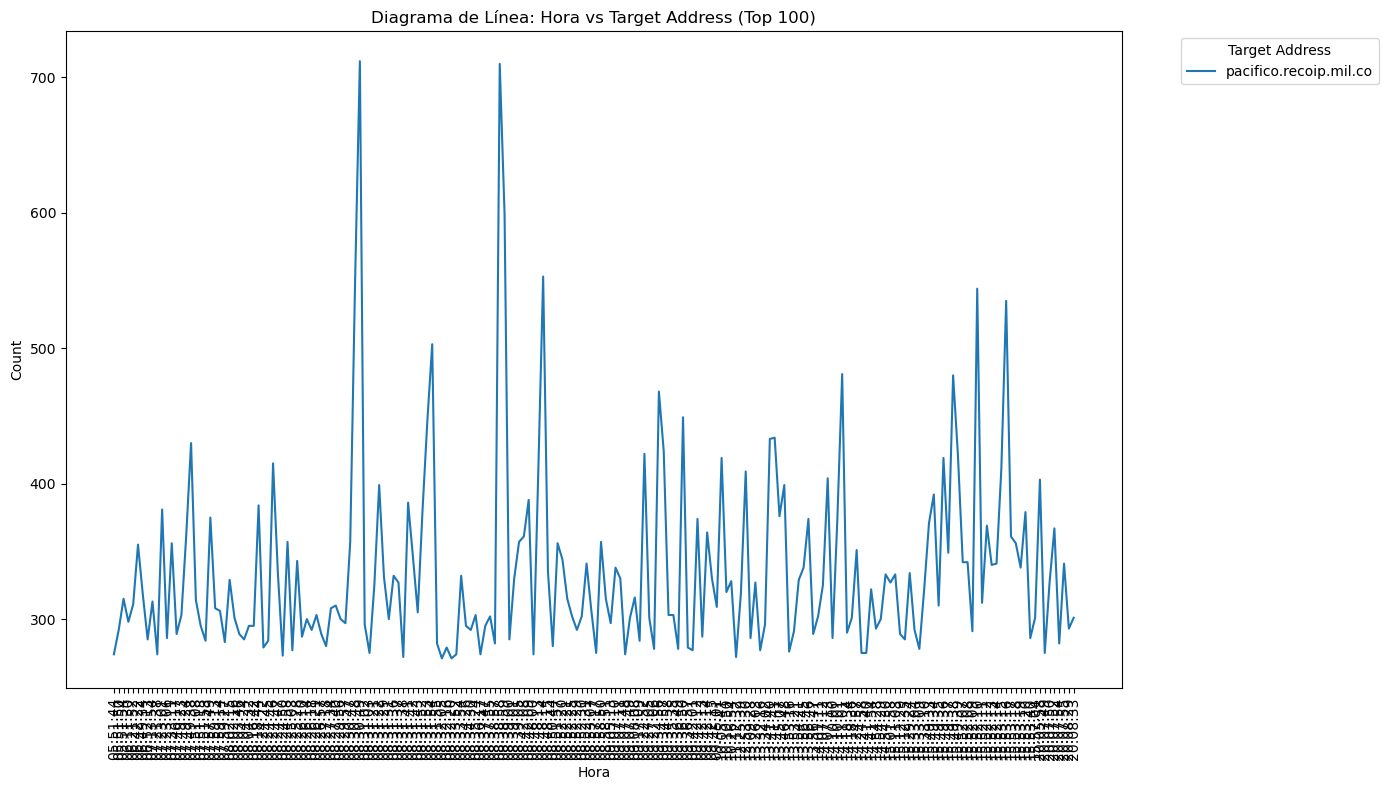

In [7]:
# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(200).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(14, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.target_address'].unique():
    subset = top_100[top_100['json.target_address'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs Target Address (Top 100)')
plt.legend(title='Target Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

# Agrupación por hora -> json.source_address

Direcciones destino (internas)

In [8]:
#df["json.source_asset"].unique()

In [9]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_asset']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

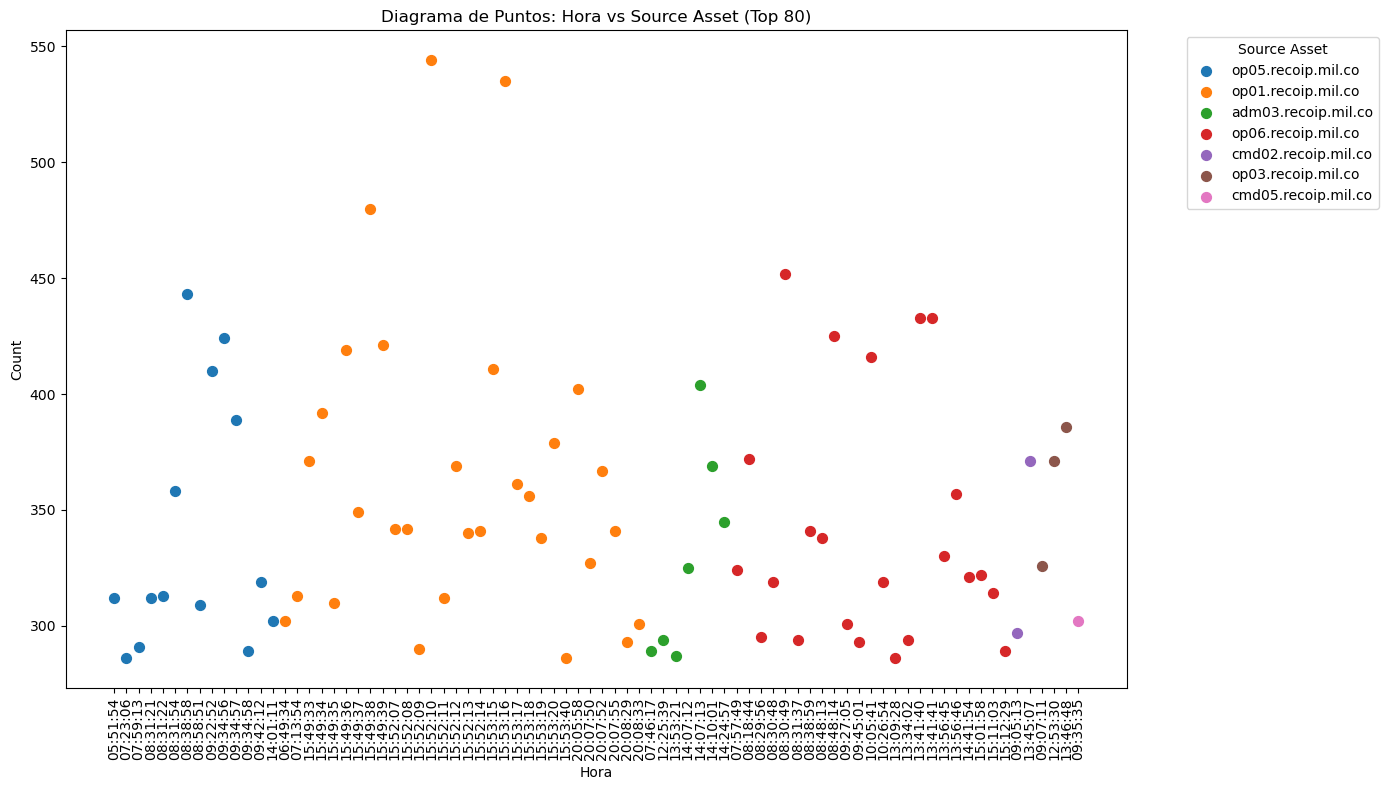

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_asset']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 80 registros
top_80 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de puntos
plt.figure(figsize=(14, 8))

# Graficar cada 'json.source_asset' individualmente como puntos
for asset in top_80['json.source_asset'].unique():
    subset = top_80[top_80['json.source_asset'] == asset]
    plt.scatter(subset['hora'], subset['count'], label=asset, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Source Asset (Top 80)')
plt.legend(title='Source Asset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()


# Por Fecha 

Primeros 7 datos en orden descendente por 'count':
          fecha    json.source_asset   count
31   2024/07/16   op01.recoip.mil.co  146349
151  2024/07/23   op05.recoip.mil.co   47643
81   2024/07/18   op06.recoip.mil.co   41485
152  2024/07/23   op06.recoip.mil.co   28261
58   2024/07/17   op06.recoip.mil.co   27568
133  2024/07/22   op06.recoip.mil.co   24889
46   2024/07/17  ana04.recoip.mil.co   24357


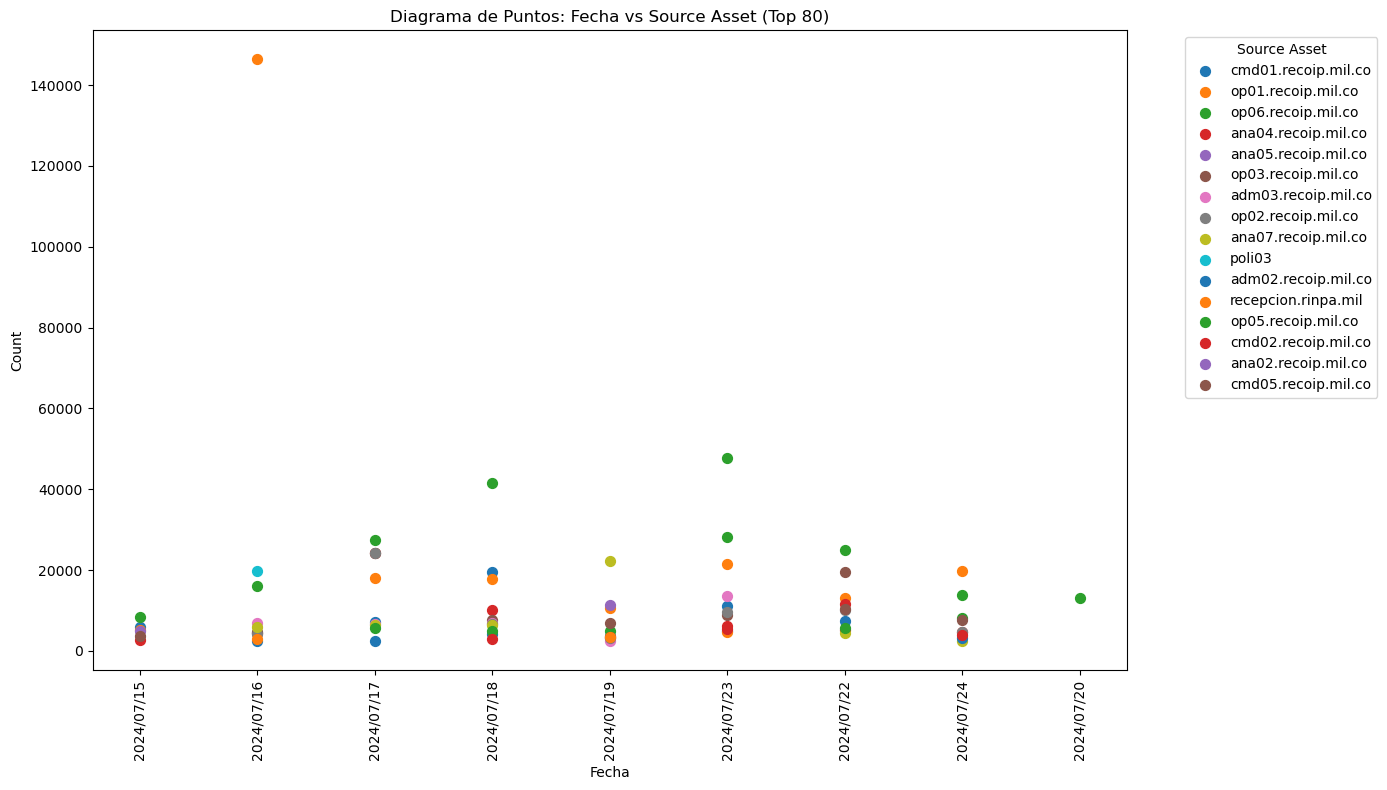

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar ocurrencias
df_agrupado = df.groupby(['fecha', 'json.source_asset']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 80 registros
top_80 = df_agrupado.head(80).sort_values(by='fecha')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(df_agrupado.head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(14, 8))

# Graficar cada 'json.source_asset' individualmente como puntos
for asset in top_80['json.source_asset'].unique():
    subset = top_80[top_80['json.source_asset'] == asset]
    plt.scatter(subset['fecha'], subset['count'], label=asset, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Fecha')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Fecha vs Source Asset (Top 80)')
plt.legend(title='Source Asset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()



# Agrupación  json.acess_type

Tipo de Modificación al archivo 

In [19]:
#df["json.access_types"].unique()

In [14]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.access_types']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

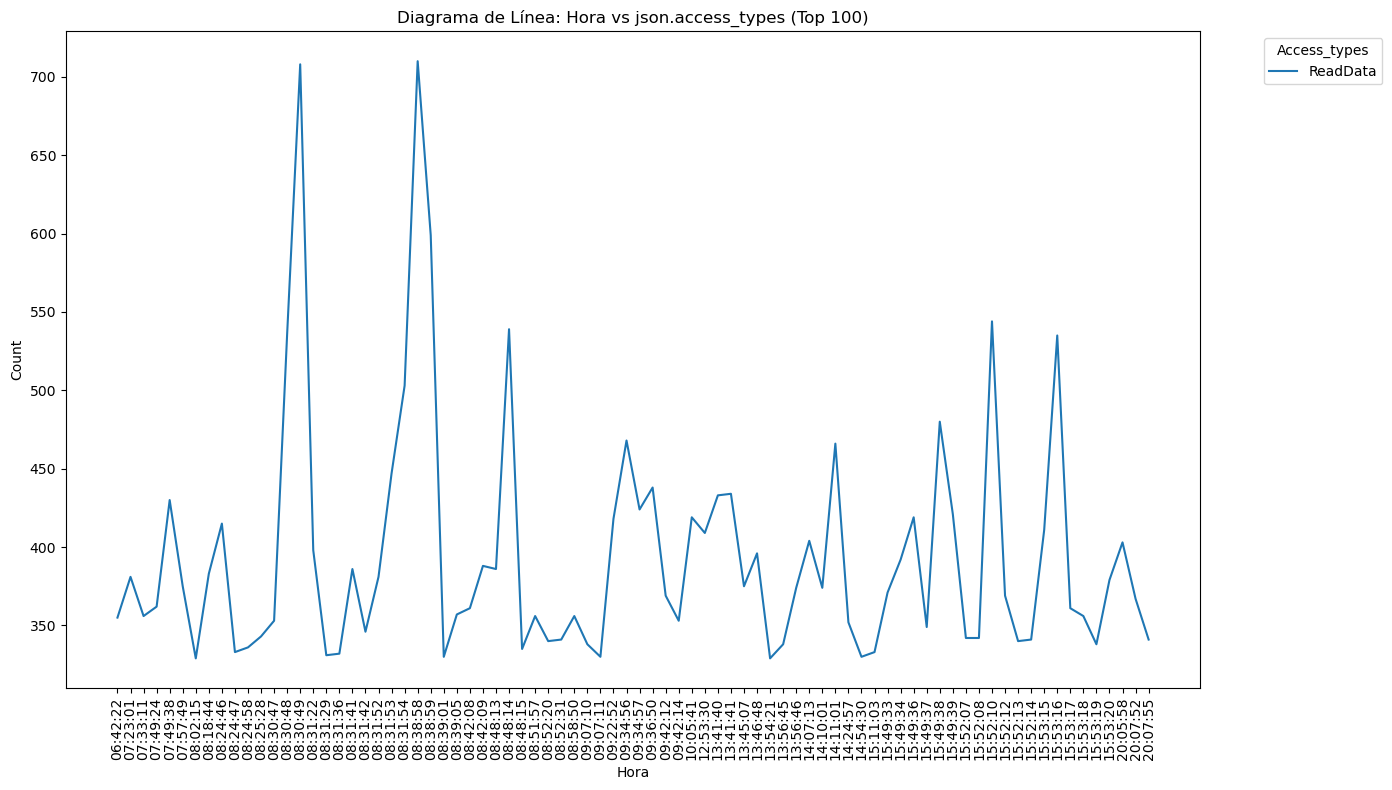

In [15]:
# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(80).sort_values(by='hora')

# Crear el diagrama de línea
plt.figure(figsize=(14, 8))

# Graficar cada 'json.target_address' individualmente
for address in top_100['json.access_types'].unique():
    subset = top_100[top_100['json.access_types'] == address]
    plt.plot(subset['hora'], subset['count'], label=address)

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Línea: Hora vs json.access_types (Top 100)')
plt.legend(title='Access_types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

# Agrupación por codigo de Evento 

json.source_json.eventCode: Códigos de Microsoft 

## Código 5145

El evento 5145 se genera cuando un intento de acceso a un recurso compartido de archivos es exitoso. Este evento proporciona detalles sobre el tipo de acceso solicitado y la identidad del usuario o proceso que intenta acceder al recurso.

In [16]:
# Contar ocurrencias de cada valor único en la columna 'json.source_json.eventCode'
conteo_unico = df["json.source_json.eventCode"].value_counts()

# Convertir el resultado en un DataFrame para mejor presentación
conteo_unico_df = conteo_unico.reset_index()
conteo_unico_df.columns = ['Event Code', 'Count']

# Mostrar el DataFrame con los conteos
print(conteo_unico_df)

   Event Code    Count
0        5145  1000000


In [17]:
# 1. Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_json.eventCode']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

Primeros 7 datos en orden descendente por 'count':
           hora  json.source_json.eventCode  count
9548   08:30:49                        5145    712
10028  08:38:58                        5145    710
10029  08:38:59                        5145    599
10517  08:48:14                        5145    553
9547   08:30:48                        5145    548
27993  15:52:10                        5145    544
28041  15:53:16                        5145    535


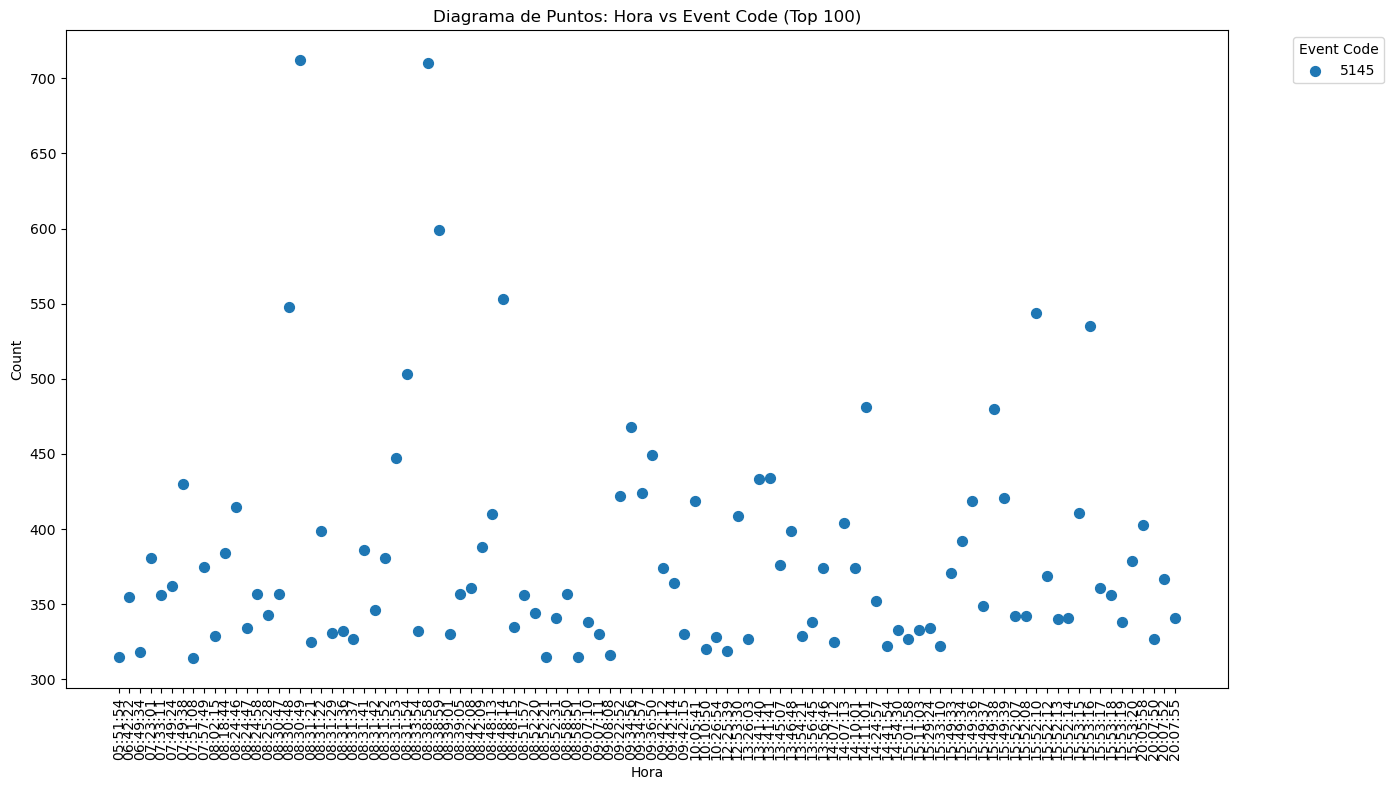

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar ocurrencias
df_agrupado = df.groupby(['hora', 'json.source_json.eventCode']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(100).sort_values(by='hora')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(df_agrupado.head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(14, 8))

# Graficar cada 'json.source_json.eventCode' individualmente como puntos
for event_code in top_100['json.source_json.eventCode'].unique():
    subset = top_100[top_100['json.source_json.eventCode'] == event_code]
    plt.scatter(subset['hora'], subset['count'], label=event_code, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Hora')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Hora vs Event Code (Top 100)')
plt.legend(title='Event Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()


# Por Fecha 

Primeros 7 datos en orden descendente por 'count':
        fecha  json.source_json.eventCode   count
1  2024/07/16                        5145  223510
8  2024/07/23                        5145  164434
2  2024/07/17                        5145  154339
3  2024/07/18                        5145  134699
7  2024/07/22                        5145  118702
4  2024/07/19                        5145   78186
9  2024/07/24                        5145   74667


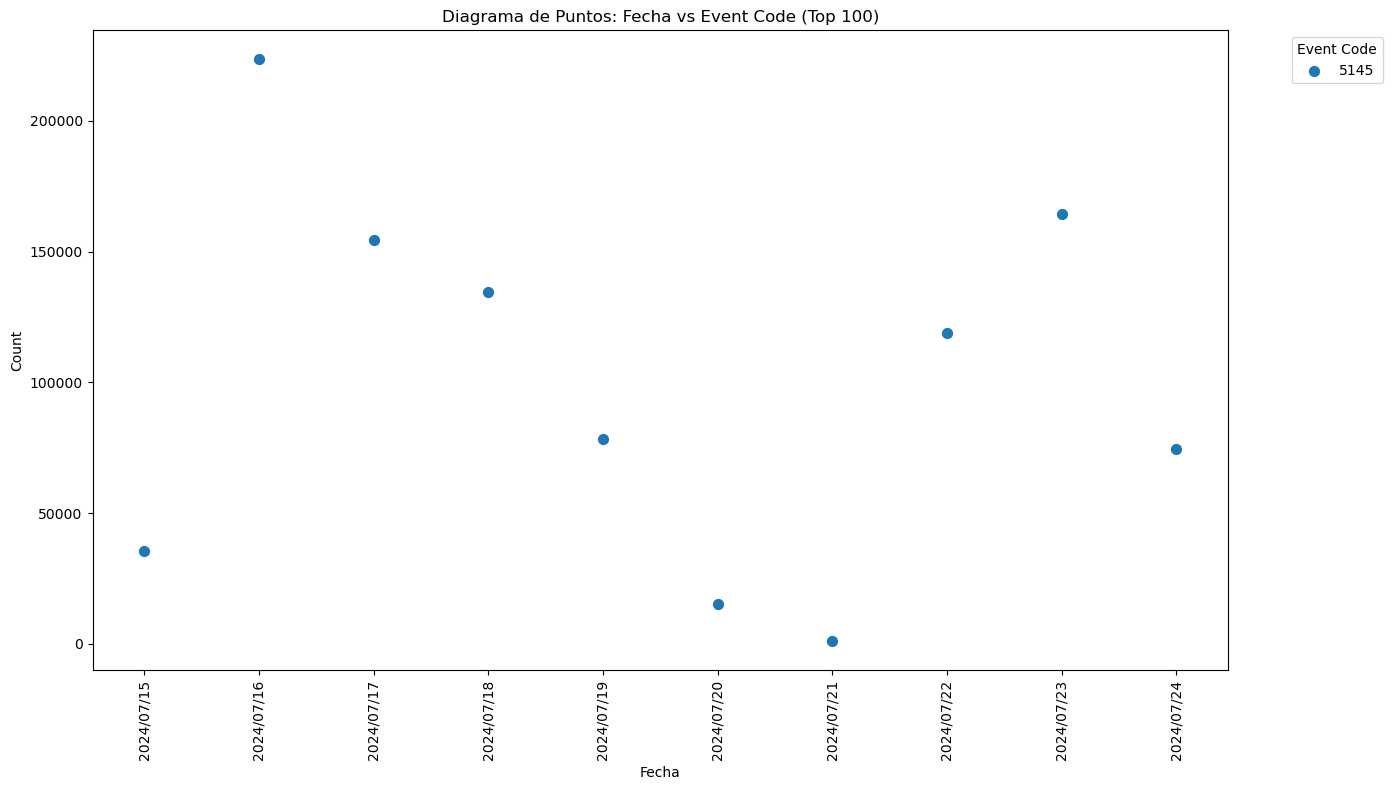

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar ocurrencias
df_agrupado = df.groupby(['fecha', 'json.source_json.eventCode']).size().reset_index(name='count')

# Ordenar df_agrupado por la columna 'count' en orden descendente
df_agrupado = df_agrupado.sort_values(by='count', ascending=False)

# Seleccionar los primeros 100 registros
top_100 = df_agrupado.head(200).sort_values(by='fecha')

# Mostrar los primeros 7 datos en orden descendente por 'count'
print("Primeros 7 datos en orden descendente por 'count':")
print(df_agrupado.head(7))

# Crear el diagrama de puntos
plt.figure(figsize=(14, 8))

# Graficar cada 'json.source_json.eventCode' individualmente como puntos
for event_code in top_100['json.source_json.eventCode'].unique():
    subset = top_100[top_100['json.source_json.eventCode'] == event_code]
    plt.scatter(subset['fecha'], subset['count'], label=event_code, s=50)  # s controla el tamaño de los puntos

plt.xlabel('Fecha')
plt.ylabel('Count')
plt.title('Diagrama de Puntos: Fecha vs Event Code (Top 100)')
plt.legend(title='Event Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()
